# Vaiables BEGINNER

Esta tabla contiene la información de los grupos de parámetros de funciones y Lambda expresiones BEGINNER.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'variable__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('variables')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-27 12:56:48.734716 Data cache files found ...
2024-05-27 12:56:50.748072 Data cache files successfully loaded!!
The dataset contains 1145346 (41.17%) instances for BEGINNER class and 1636752 (58.83%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'variables'
TABLE_FEATURES = ['variable__name_convention', 'variable__number_of_characters', 'variable__is_private', 'variable__is_magic']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (1145346, 4)
As we can see the downloaded data contains a total of 1145346 instances. Each of the instances corresponds to a program. For each program we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1145346 entries, 0 to 1146595
Data columns (total 4 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   variable__name_convention       1145346 non-null  object
 1   variable__number_of_characters  1145346 non-null  int64 
 2   variable__is_private            1145346 non-null  bool  
 3   variable__is_magic              1145346 non-null  bool  
dtypes: bool(2), int64(1), object(1)
memory usage: 28.4+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 2 variables boleanas y 2 de tipo objeto. Una de las últimas variables es la etiqueta de la instancia. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.97%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

variable__name_convention         0
variable__number_of_characters    0
variable__is_private              0
variable__is_magic                0
dtype: int64

In [6]:
print_empty_cols(X)

variable__name_convention
-------------------------
0 instancias no tienen un valor para la columna variable__name_convention


variable__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna variable__number_of_characters


variable__is_private
--------------------
0 instancias no tienen un valor para la columna variable__is_private


variable__is_magic
------------------
0 instancias no tienen un valor para la columna variable__is_magic




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
variable__name_convention,1145346,7,Lower,833509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__number_of_characters,1145346.0,NaN,NaN,NaN,6.429564,4.467813,1.0,4.0,5.0,8.0,50.0
variable__is_private,1145346,2,False,1124762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__is_magic,1145346,2,False,1140663,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "variable__number_of_characters": [(0.0, 4.0), (4.0, 4.0), (4.0, 10.0), (10.0, inf)], # min: 0 ; max: 82
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['variable__number_of_characters'], 10))
print(get_statistics(full_table, ['variable__name_convention'], 10))
print(get_statistics(X_copy, ['variable__is_private'], 10))
print(get_statistics(X_copy, ['variable__is_magic'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
variable__number_of_characters  count  percentage
                    [4.0_10.0) 415009   36.234378
                     [0.0_4.0) 262314   22.902599
                     [4.0_4.0] 236309   20.632106
                    [10.0_inf] 231714   20.230917

variable__name_convention  count  percentage
                    Lower 833509   72.773555
                SnakeCase 164256   14.341169
                  CamelUp  71048    6.203191
                 CamelLow  42461    3.707264
                    Upper  25267    2.206058
         NoNameConvention   7900    0.689748
                  Discard    905    0.079015

 variable__is_private   count  percentage
                False 1124762   98.202814
                 True   20584    1.797186

 variable__is_magic   count  percentage
              False 1140663   99.591128
               True    4683    0.408872

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (1145346, 10)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

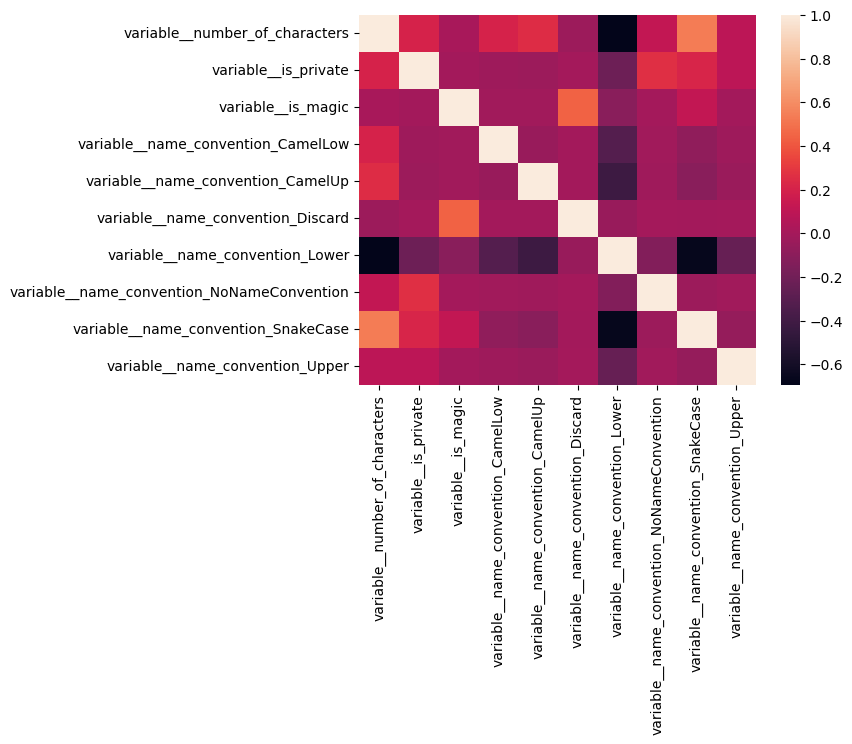

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable is_private (1/4)
Esta variable es de tipo booleano y representa si la variable es privada.

<Axes: xlabel='variable__is_private', ylabel='Count'>

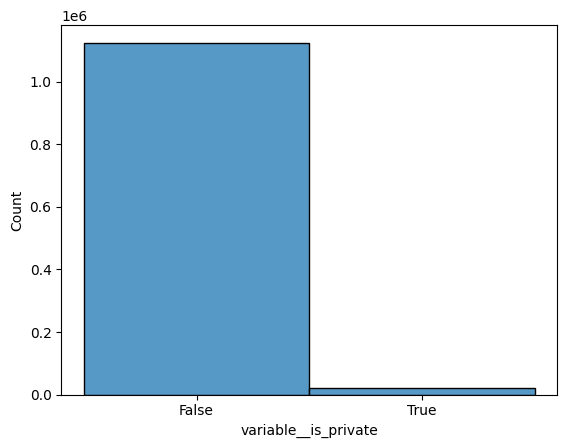

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_private'], discrete=True)

In [12]:
num_true_values = len(X[X['variable__is_private'] == True])
num_false_values = len(X[X['variable__is_private'] == False])
std = X['variable__is_private'].std()
freq_true = len(X[X['variable__is_private'] == True]) / len(X['variable__is_private'])
freq_false = len(X[X['variable__is_private'] == False]) / len(X['variable__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 20584 valores verdaderos y 1124762 valores falsos. Y, la desviación típica es de 0.13284912705421448
La frecuencia con la que programa puede tener la variable is_private a True es 0.017971861778012934.
La frecuencia con la que programa puede tener la variable is_private a False es 0.9820281382219871.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_private', possible_values)

La variable variable__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_private toma el valor de 0.0 en un 98.2% de los items.
La variable variable__is_private toma el valor de 1.0 en un 1.797% de los items.


In [14]:
X[X['variable__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,20584.000000,20584.0,20584.0,20584.0,20584.0,20584.0,20584.0,20584.000000,20584.000000,20584.000000
mean,13.245725,1.0,0.0,0.0,0.0,0.0,0.0,0.167897,0.712495,0.119607
std,6.218163,0.0,0.0,0.0,0.0,0.0,0.0,0.373784,0.452610,0.324510
min,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,9.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,13.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,17.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
max,43.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


### Variable is_magic (2/4)
Esta variable es de tipo booleano y representa si la variable es magic.

<Axes: xlabel='variable__is_magic', ylabel='Count'>

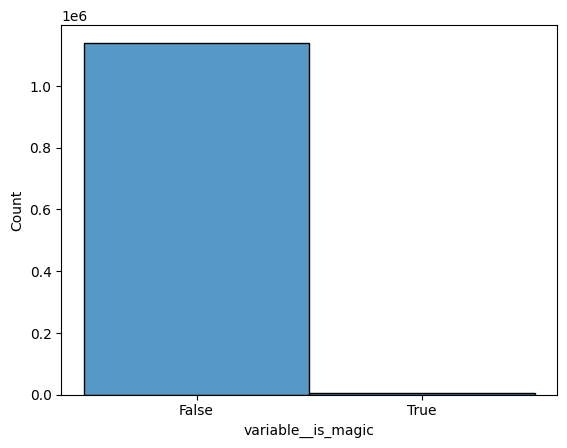

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_magic'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['variable__is_magic'] == True])
num_false_values = len(X[X['variable__is_magic'] == False])
std = X['variable__is_magic'].std()
freq_true = len(X[X['variable__is_magic'] == True]) / len(X['variable__is_magic'])
freq_false = len(X[X['variable__is_magic'] == False]) / len(X['variable__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 4683 valores verdaderos y 1140663 valores falsos. Y, la desviación típica es de 0.06381227821111679
La frecuencia con la que programa puede tener la variable is_magic a True es 0.004088720788303272.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9959112792116968.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_magic', possible_values)

La variable variable__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_magic toma el valor de 0.0 en un 99.59% de los items.
La variable variable__is_magic toma el valor de 1.0 en un 0.4089% de los items.


In [18]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['variable__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,4683.000000,4683.0,4683.0,4683.0,4683.0,4683.000000,4683.0,4683.000000,4683.000000,4683.000000
mean,7.192825,0.0,1.0,0.0,0.0,0.193252,0.0,0.003844,0.795217,0.007687
std,3.391665,0.0,0.0,0.0,0.0,0.394891,0.0,0.061885,0.403586,0.087349
min,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,7.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
50%,8.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
75%,9.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000
max,22.000000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000


### Variable number_of_characters (3/4)
Esta variable representa el número de caracteres del nombre de la variable. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 82. Con una media de 7.12.

<Axes: ylabel='variable__number_of_characters'>

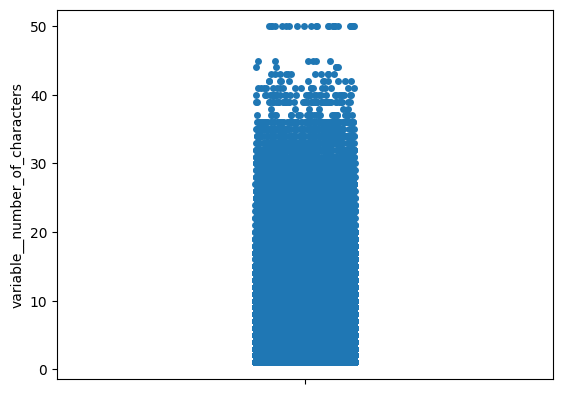

In [19]:
sns.stripplot(X['variable__number_of_characters'])

In [20]:
print_outliers_for_df_column(X, 'variable__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6655193770012888
Rango valores atípicos extremos (Tukey): [-8.0,20.0]
Rango valores atípicos leves (Tukey): [-2.0,14.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.4158271420305266,93.95612376064638]
-3.0IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -8.0 (Q1-3*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -2.0 (Q1-1.5*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 67884 instancias tienen un valor para variable__number_of_characters superior a 14.0 (Q3+1.5*IQR) para variable__number_of_characters. Representando un 5.927% del total de instancias.
+3.0IQR: 13889 instancias tienen un valor para variable__number_of_characters superior a 20.0 (Q3-3*IQR) para variable__number_of_characters. Representando un 1.213% d

In [21]:
X[X['variable__number_of_characters'] > 28].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,1673.000000,1673.000000,1673.0,1673.000000,1673.000000,1673.0,1673.0,1673.000000,1673.000000,1673.000000
mean,32.868500,0.283323,0.0,0.042439,0.070532,0.0,0.0,0.126718,0.485356,0.274955
std,3.847657,0.450747,0.0,0.201648,0.256118,0.0,0.0,0.332757,0.499935,0.446625
min,29.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,32.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,35.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000
max,50.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


### Variable name_convention (10/10)
Esta variable es de tipo categorica y representa el name convention del nombre de la variable.

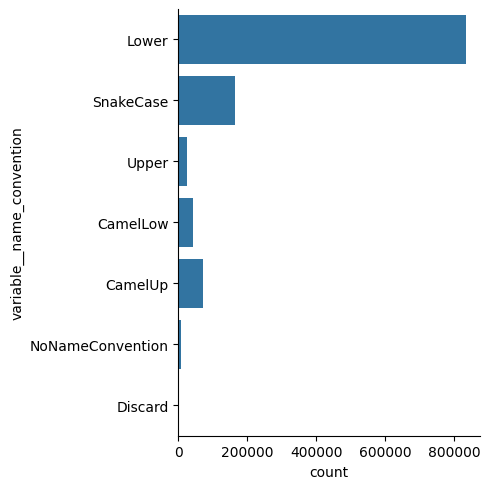

In [22]:
sns.catplot(full_table['variable__name_convention'], kind="count")

In [23]:
print_frequency_anal_for_cat_var(full_table, 'variable__name_convention')

La variable variable__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable variable__name_convention toma el valor de Lower en un 72.77% de los items.
La variable variable__name_convention toma el valor de SnakeCase en un 14.34% de los items.
La variable variable__name_convention toma el valor de CamelUp en un 6.203% de los items.
La variable variable__name_convention toma el valor de CamelLow en un 3.707% de los items.
La variable variable__name_convention toma el valor de Upper en un 2.206% de los items.
La variable variable__name_convention toma el valor de NoNameConvention en un 0.6897% de los items.
La variable variable__name_convention toma el valor de Discard en un 0.07902% de los items.
